<a href="https://colab.research.google.com/github/matteoalberti/Lectures_AdvCV_Experis2020/blob/main/day1/DL4CV_00_Introduction_to_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome!**

# Introduction to Machine Learning for Computer Vision

#### From MLP to Convolutions!


## **Lecturer :** Matteo Alberti

![](https://avatars.githubusercontent.com/u/45932972?v=4)

*Contacts :* https://www.linkedin.com/in/matteo-alberti-170493/


# Summary


- <font color=E35F2A>**From MLP to convolutions** </font>
  - Convolutions
  - Receiptive Field
  - Padding
  - Pooling
  - Layers


### Introduction to Convolutions

The fundamental difference between fully connected and convolutional neural networks is the connection between consecutive layers.

In fully connected network each neuron is connected to all neuron in the previous layer. We saw that in previous notebook. In a convolutional layer instead each neuron is connected to a (typically small) number of neurons in the previous layer. Furthermore all neurons in the same layer are coonected to the previous layer in the same way, they have the exact same way, with the same weights. This operation is known as convolution and in a nutshell it means applying a small filter across an image.

![](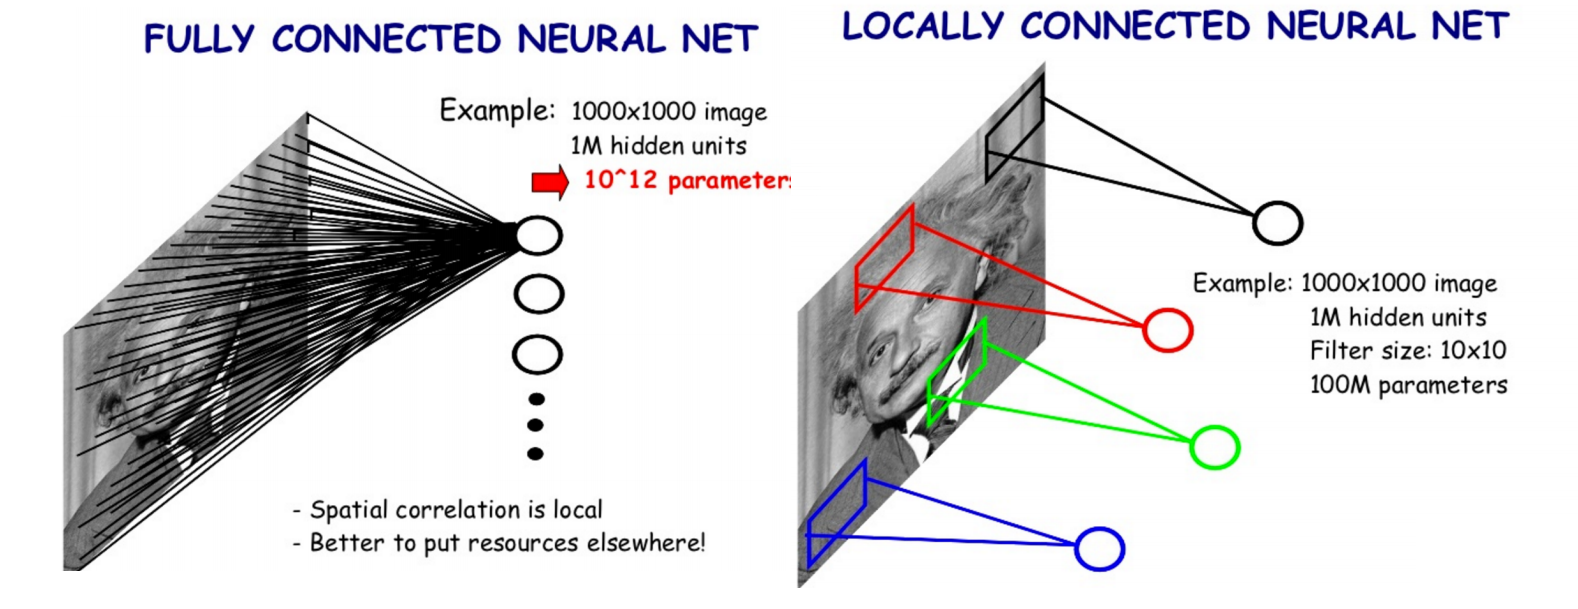%0A)

*Convolutional neural networks use three basic ideas:* 
- **local receptive fields** 
- **shared weights** 
- **pooling** 

*Let's look at each of these ideas in turn.*


##  Local Receptive Fields and Shared Weights

In the fully-connected layers shown earlier, the inputs were depicted as a vertical line of neurons. 

<div>
<img src="https://blog.christianperone.com/wp-content/uploads/2017/11/slice-post-receptive-field.png" width="500"/>

<img src="https://i0.wp.com/theailearner.com/wp-content/uploads/2018/12/convolution-layer.gif?resize=244%2C259&ssl=1" width="200"/>

</div>

**EXAMPLE :**
- **Receptive Fields** : (3x3)
- **Stride** : 1

*We will connect the input pixels to a layer of hidden neurons. But we don't connect every input pixel to every hidden neuron. Instead, we only make connections in small, localized regions of the input image.*

That region in the input image is called the local receptive field for the hidden neuron. 

I've shown the local receptive field being moved by one pixel at a time. In fact, sometimes a different stride length is used. For instance, we might move the local receptive field $2$ pixels to the right (or down), in which case we'd say a stride length of $2$ is used.

**Each neuron has a bias** where *all the neurons in the first hidden layer detect exactly the same feature just at different locations in the input image*

This means that :

- Share weights and biases

*Share weights* :  use the same weight vector to do the “convolution”

![](https://qph.fs.quoracdn.net/main-qimg-be1d825abc83695768003bacd39a3884.webp)

*Example* :

- input layer is  x=[x1 x2 x3 x4 x5 x6 x7]
- hidden layer is  h=[h1 h2 h3]
- w=[w1 w2 w3] = [1 0 -1] 

*Where h1 = w * x[:$w_{shape}$] and so on . . .*


*Why this is useful?* : 

**A big advantage of sharing weights and biases is that it greatly reduces the number of parameters involved in a convolutional network**

and produce a so called **feature map**

![](https://drive.google.com/uc?export=view&id=1qrMxu_0R3VhGuMOFwdzqAnkTXw2g4Lpl)





## Why 3x3 convolution?

- 1x1 convolution

- 3x3 convolution

- 5x5 convolution

### Striding and Padding

We can have different striding and padding, we would like to summarize in the following way :

![](https://drive.google.com/uc?export=view&id=1TOgjB4vUCZX7nPWTNCiF_HBqGPZSPReo)

## What if we have more than 1 channel?

![](https://miro.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif)

![](https://miro.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif)

**We add a Bias** *to the feature map produced*


<div>
<img src="https://i.stack.imgur.com/ddyfr.png" width="500"/>

<img src="https://i.stack.imgur.com/t2mC3.png" width="500"/>

</div>

*a bias value allows you to shift the activation function to the left or right*

## *We want to calculate all the weights and the shapes layer by layer* :

------------------------------------------

- width w 
- height h
- previous layer’s filters: $k_{l-1}$ 
- filters  in the current layer $k_{l}$
- number of neurons : n
- Input volume size : I
- Receiptived Field : F
- Padding : P
- Stride : S

----------------------------------------
### Parameters

**CONV Layer :**  ((w * h * $k_{l-1}$)+1)* $k_{l}$)

**Pooling Layer :** no parameters

**Fully-Connected Layer (Dense) :** $(n_{l-1} * n_{l}) +1 * n_{l}$

------------------------------------------
### Shapes

**CONV Layer :** $(I - F + 2P )/ S+1$




## Pooling Operator 

*Pooling layers are usually used immediately after convolutional layers. What the pooling layers do is simplify the information in the output from the convolutional layer. Pool layers perform a downsampling operation along the spatial dimensions (width, height)*

**EXAMPLE : (28x28x32) ---> (14x14x32)**

![](https://drive.google.com/uc?export=view&id=1oTdr9FGhetxTnIhT-nNV6d47T5xpHOP6)

*This will be helpful for the following reasons* :

- pooling reduces the size of the data to be processed
- pooling reduces the number of parameters to be processed


## Type of Pooling

- Max Pooling
- Min Pooling
- Avg Pooling

# Example!


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


label : 0


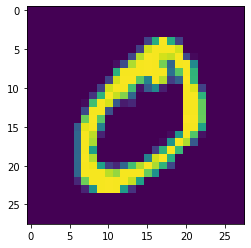

In [ ]:
print("label : {}".format(y_train[1]))
plt.imshow(x_train[1])
plt.show()

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		    [0, 0, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0]]

data = np.asarray(data)
data = data.reshape(1, 8, 8, 1)

data.shape

(1, 8, 8, 1)

In [ ]:
# create model
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1))
])

# summarize model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


We want to force the filter as a vertical line of 1 

In [ ]:
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [np.asarray(detector), np.asarray([0.0])]
# store the weights in the model
model.set_weights(weights)

In [ ]:
model.trainable_variables

[<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
 array([[[[0.]],
 
         [[1.]],
 
         [[0.]]],
 
 
        [[[0.]],
 
         [[1.]],
 
         [[0.]]],
 
 
        [[[0.]],
 
         [[1.]],
 
         [[0.]]]], dtype=float32)>,
 <tf.Variable 'conv2d_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [ ]:
# apply filter to input data
yhat = model.predict(data)

#### Activations in the single feature map

In [ ]:
for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

#[batch, rows, columns, filters]

[1.0, 2.0, 3.0, 3.0, 0.0, 0.0]
[1.0, 2.0, 3.0, 3.0, 0.0, 0.0]
[1.0, 1.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


## Pooling Operator

In [ ]:
# create model
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)),
                             tf.keras.layers.MaxPool2D()
])

# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 1)           10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [np.asarray(detector), np.asarray([0.0])]
# store the weights in the model
model.set_weights(weights)

# apply filter to input data
yhat = model.predict(data)

for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

#[batch, rows, columns, filters]

[2.0, 3.0, 0.0]
[1.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


### Back to mnist

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(1, (3,3), activation='relu', input_shape=(28, 28, 1))
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 1)         10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


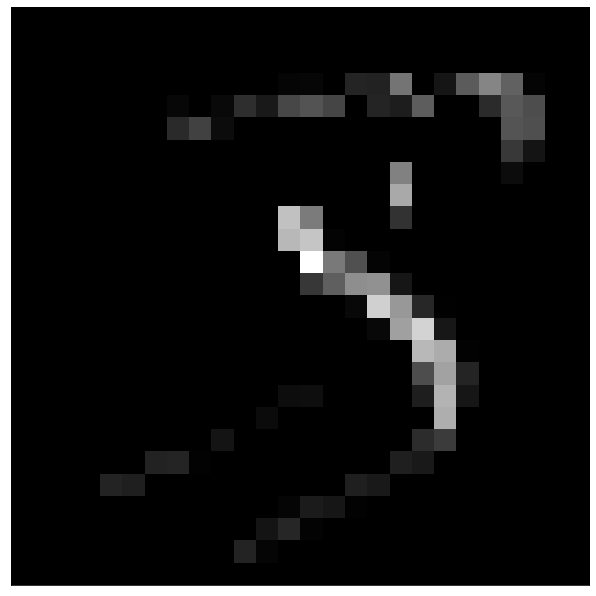

In [ ]:
# get feature map for first hidden layer
feature_maps = model(x_train[:1]).numpy()
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1

plt.figure(figsize=(100,100))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
# show the figure
plt.show()

## Original Picture

label : 5


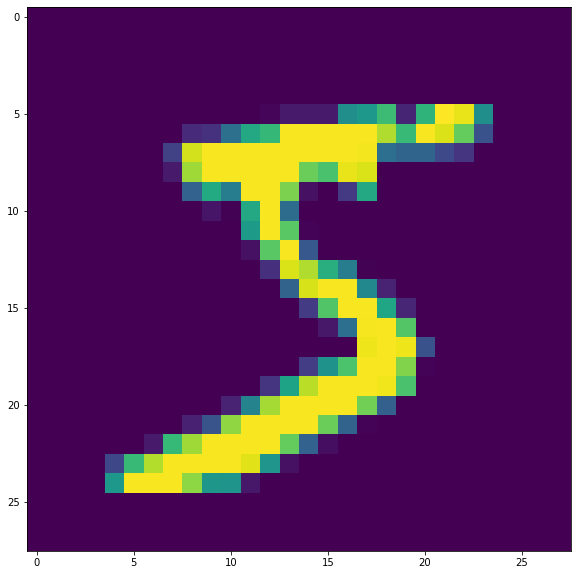

In [ ]:
plt.figure(figsize=(10,10))
print("label : {}".format(y_train[0]))
plt.imshow(x_train[0])
plt.show()